In [1]:
import numpy as np
import random
import torch
from collections import defaultdict

import matplotlib.pyplot as plt

from dqn import DQNAgent

In [2]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

In [3]:
SEEDS = [123, 42, 2025]

In [4]:
def average_dicts(dicts):
    avg = defaultdict(list)
    for d in dicts:
        for k, v in d.items():
            avg[k].append(v)
    # Take mean for each key
    return {k: np.mean(v) for k, v in avg.items()}

## CartPole

### LR

In [ ]:
lrs = [3e-3, 1e-3, 3e-4]
cp_results_lr = {}

for lr in lrs:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="CartPole-v1",
            hidden_dim=128,
            episodes=800,
            batch_size=64,
            num_steps=500,
            num_layers=2,
            learning_rate=lr,
            eval_interval=5,
            epsilon=1.0,
            tau = 1.0,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=0.99
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    cp_results_lr[f"LR={lr}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward")
plt.title("DQN Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward")
plt.title("DQN Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
lrs = [3e-3, 1e-3, 3e-4]
cpt_results_lr = {}

for lr in lrs:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="CartPole-v1",
            hidden_dim=128,
            episodes=800,
            batch_size=64,
            num_steps=500,
            num_layers=2,
            learning_rate=lr,
            eval_interval=5,
            epsilon=1.0,
            tau = 0.05,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=0.99
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    cpt_results_lr[f"LR={lr}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cpt_results_lr.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward")
plt.title("DQN with Soft Update Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in cpt_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cpt_results_lr.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward")
plt.title("DQN with Soft Update Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in cpt_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

### Eps Decay

In [5]:
eps_decay_list = [0.99, 0.995, 0.999]
episodes = [900, 1000, 2000]
cp_results_eps = {}
agents1 = []

for idx, eps_decay in enumerate(eps_decay_list):
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("eps_decay = ", eps_decay, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="CartPole-v1",
            hidden_dim=128,
            episodes=episodes[idx],
            batch_size=64,
            num_steps=500,
            num_layers=2,
            learning_rate=1e-3,
            eval_interval=5,
            epsilon=1.0,
            tau = 1.0,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=eps_decay
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)
        agents1.append(dqn_agent)

    avg_train_rewards = average_dicts(all_train_rewards)
    avg_eval_rewards = average_dicts(all_eval_rewards)

    cp_results_eps[f"eps_decay={eps_decay}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

eps_decay =  0.99 seed =  0
eps_decay =  0.99 seed =  42
eps_decay =  0.99 seed =  5
eps_decay =  0.995 seed =  0
eps_decay =  0.995 seed =  42
eps_decay =  0.995 seed =  5
eps_decay =  0.999 seed =  0
eps_decay =  0.999 seed =  42
eps_decay =  0.999 seed =  5


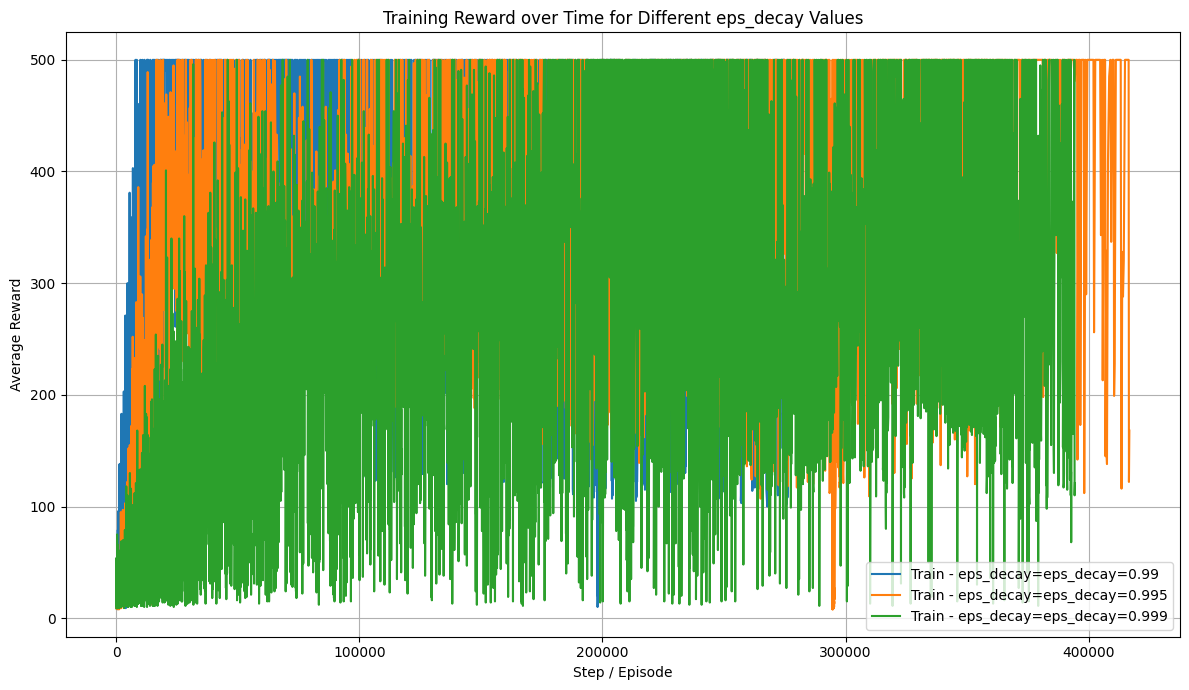

In [6]:
plt.figure(figsize=(12, 7))
# Loop through all eps_decay values
for eps_decay, results in cp_results_eps.items():
    # Sort and extract training rewards
    train_steps = sorted(results["avg_train_rewards"].keys())
    train_values = [results["avg_train_rewards"][k] for k in train_steps]

    # Plot both with distinct labels
    plt.plot(train_steps, train_values, label=f'Train - eps_decay={eps_decay}', linestyle='-')

plt.xlabel('Step / Episode')
plt.ylabel('Average Reward')
plt.title('Training Reward over Time for Different eps_decay Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

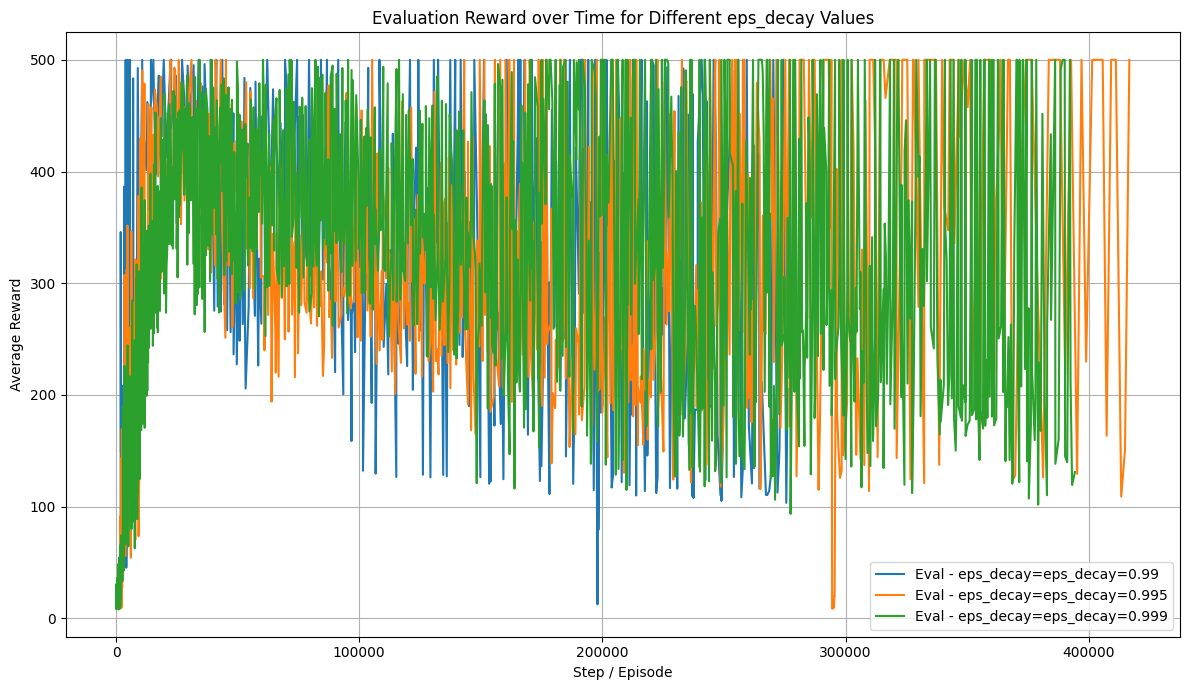

In [7]:
plt.figure(figsize=(12, 7))
# Loop through all eps_decay values
for eps_decay, results in cp_results_eps.items():
    # Sort and extract evaluation rewards
    eval_steps = sorted(results["avg_eval_rewards"].keys())
    eval_values = [results["avg_eval_rewards"][k] for k in eval_steps]

    # Plot both with distinct labels
    plt.plot(eval_steps, eval_values, label=f'Eval - eps_decay={eps_decay}')

plt.xlabel('Step / Episode')
plt.ylabel('Average Reward')
plt.title('Evaluation Reward over Time for Different eps_decay Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
eps_decay_list = [0.99, 0.995, 0.999]
episodes = [900, 1300, 2000]
cpt_results_eps = {}
agents2 = []

for idx, eps_decay in enumerate(eps_decay_list):
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("eps_decay = ", eps_decay, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="CartPole-v1",
            hidden_dim=128,
            episodes=episodes[idx],
            batch_size=64,
            num_steps=500,
            num_layers=2,
            learning_rate=1e-3,
            eval_interval=5,
            epsilon=1.0,
            tau = 0.05,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=eps_decay
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)
        agents2.append(dqn_agent)

    avg_train_rewards = average_dicts(all_train_rewards)
    avg_eval_rewards = average_dicts(all_eval_rewards)

    cpt_results_eps[f"eps_decay={eps_decay}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
}

eps_decay =  0.99 seed =  0
eps_decay =  0.99 seed =  42
eps_decay =  0.99 seed =  5
eps_decay =  0.995 seed =  0
eps_decay =  0.995 seed =  42


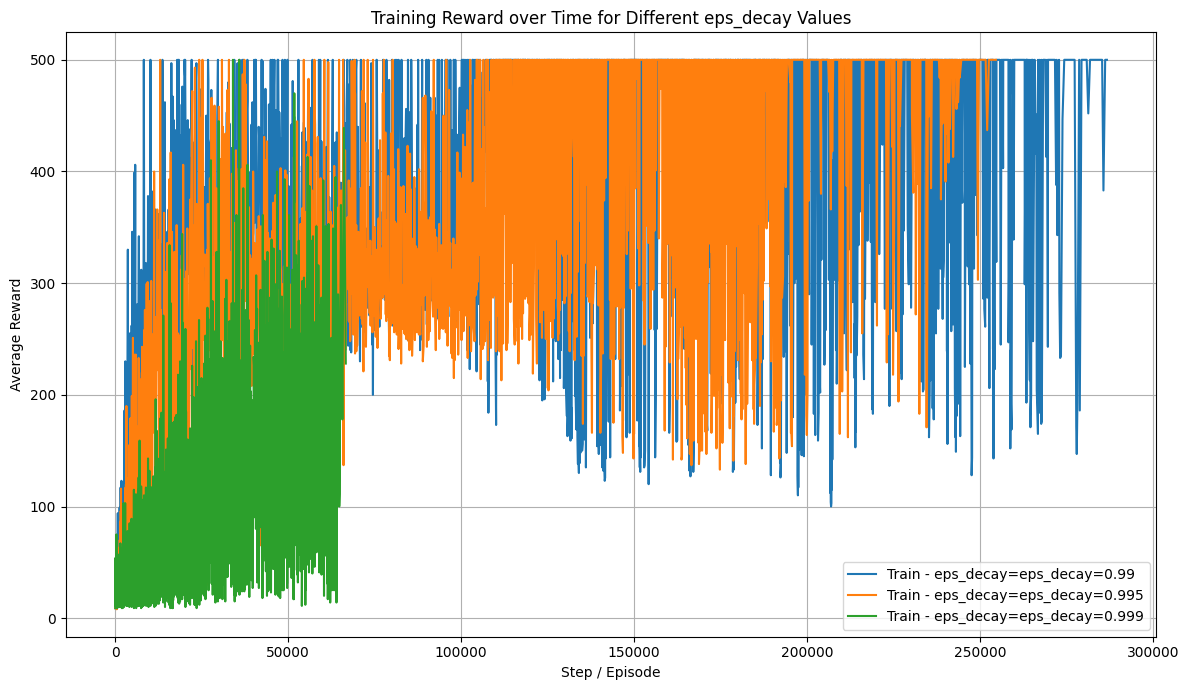

In [9]:
plt.figure(figsize=(12, 7))
# Loop through all eps_decay values
for eps_decay, results in cpt_results_eps.items():
    # Sort and extract training rewards
    train_steps = sorted(results["avg_train_rewards"].keys())
    train_values = [results["avg_train_rewards"][k] for k in train_steps]

    # Plot both with distinct labels
    plt.plot(train_steps, train_values, label=f'Train - eps_decay={eps_decay}', linestyle='-')

plt.xlabel('Step / Episode')
plt.ylabel('Average Reward')
plt.title('Training Reward over Time for Different eps_decay Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

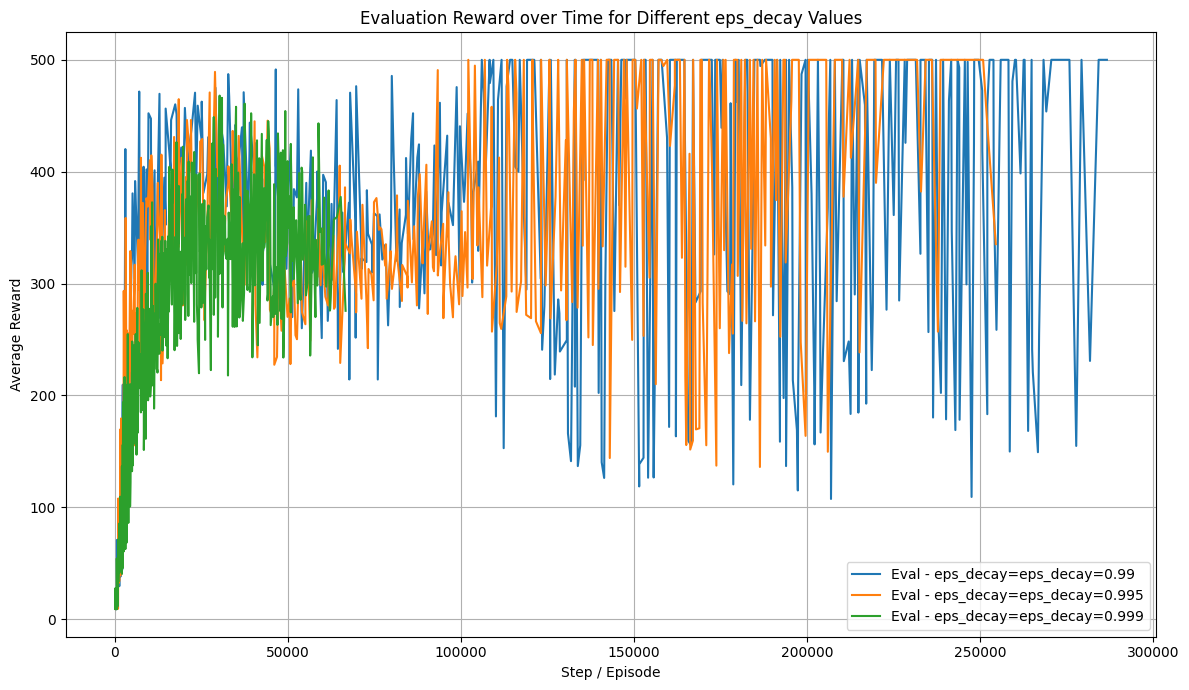

In [10]:
plt.figure(figsize=(12, 7))
# Loop through all eps_decay values
for eps_decay, results in cpt_results_eps.items():
    # Sort and extract evaluation rewards
    eval_steps = sorted(results["avg_eval_rewards"].keys())
    eval_values = [results["avg_eval_rewards"][k] for k in eval_steps]

    # Plot both with distinct labels
    plt.plot(eval_steps, eval_values, label=f'Eval - eps_decay={eps_decay}')

plt.xlabel('Step / Episode')
plt.ylabel('Average Reward')
plt.title('Evaluation Reward over Time for Different eps_decay Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
eps_decay_list = [0.99, 0.995, 0.999]
episodes = [900, 1300, 2000]
cpt0_results_eps = {}
agents3 = []

for idx, eps_decay in enumerate(eps_decay_list):
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("eps_decay = ", eps_decay, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="CartPole-v1",
            hidden_dim=128,
            episodes=episodes[idx],
            batch_size=64,
            num_steps=500,
            num_layers=2,
            learning_rate=1e-3,
            eval_interval=5,
            epsilon=1.0,
            tau = 0.0,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=eps_decay
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)
        agents3.append(dqn_agent)

    avg_train_rewards = average_dicts(all_train_rewards)
    avg_eval_rewards = average_dicts(all_eval_rewards)

    cpt0_results_eps[f"eps_decay={eps_decay}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
}

eps_decay =  0.99 seed =  0
eps_decay =  0.99 seed =  42
eps_decay =  0.99 seed =  5
eps_decay =  0.995 seed =  0
eps_decay =  0.995 seed =  42
eps_decay =  0.995 seed =  5
eps_decay =  0.999 seed =  0
eps_decay =  0.999 seed =  42
eps_decay =  0.999 seed =  5


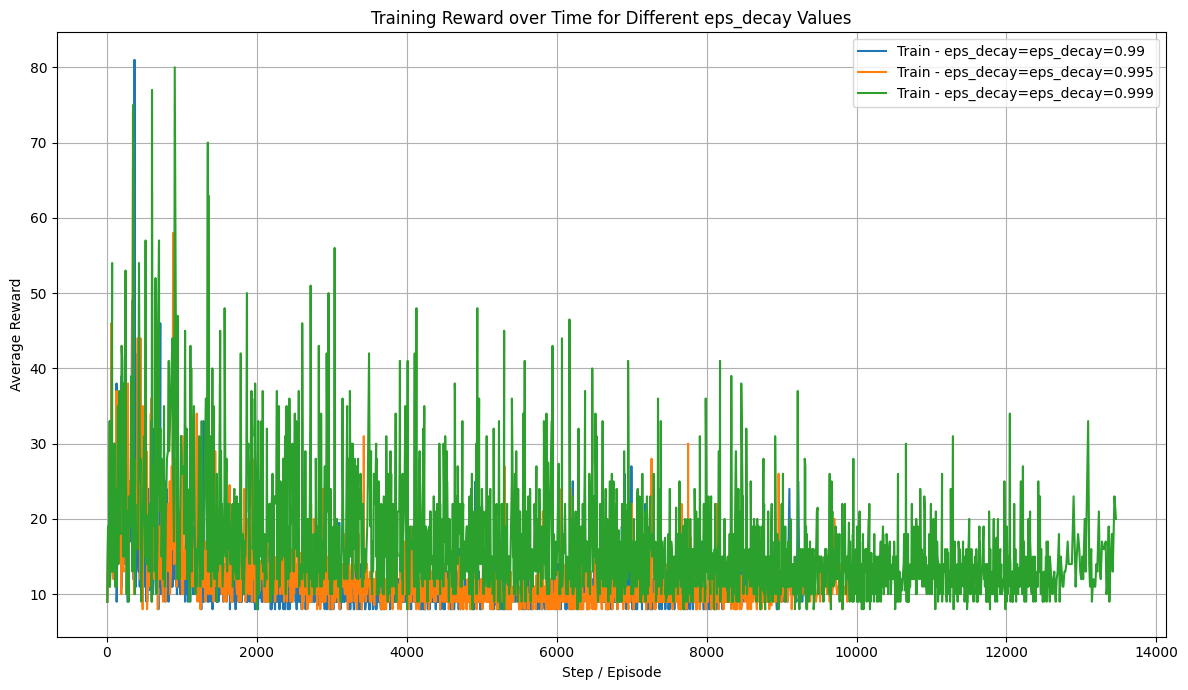

In [12]:
plt.figure(figsize=(12, 7))
# Loop through all eps_decay values
for eps_decay, results in cpt0_results_eps.items():
    # Sort and extract training rewards
    train_steps = sorted(results["avg_train_rewards"].keys())
    train_values = [results["avg_train_rewards"][k] for k in train_steps]

    # Plot both with distinct labels
    plt.plot(train_steps, train_values, label=f'Train - eps_decay={eps_decay}', linestyle='-')

plt.xlabel('Step / Episode')
plt.ylabel('Average Reward')
plt.title('Training Reward over Time for Different eps_decay Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

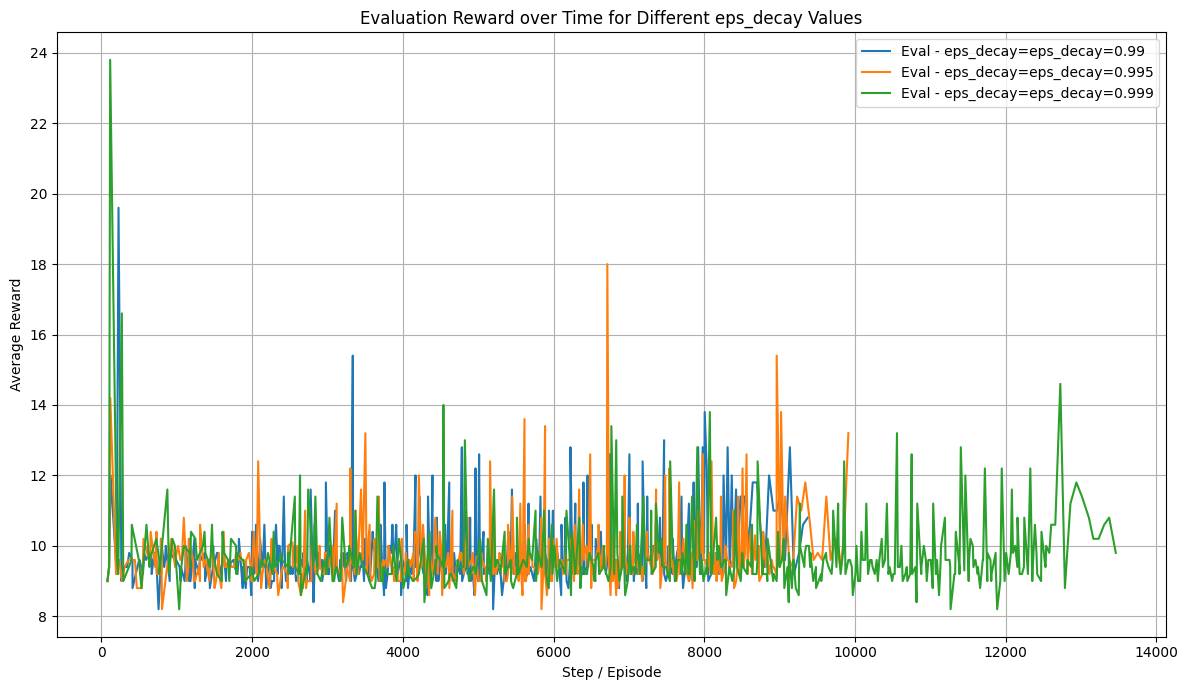

In [13]:
plt.figure(figsize=(12, 7))
# Loop through all eps_decay values
for eps_decay, results in cpt0_results_eps.items():
    # Sort and extract evaluation rewards
    eval_steps = sorted(results["avg_eval_rewards"].keys())
    eval_values = [results["avg_eval_rewards"][k] for k in eval_steps]

    # Plot both with distinct labels
    plt.plot(eval_steps, eval_values, label=f'Eval - eps_decay={eps_decay}')

plt.xlabel('Step / Episode')
plt.ylabel('Average Reward')
plt.title('Evaluation Reward over Time for Different eps_decay Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
import numpy as np

for eps_decay, results in cp_results_eps.items():
    filename = f'avg_train_rewards_{eps_decay}.npy'
    np.save(filename, results["avg_train_rewards"], allow_pickle=True)


In [67]:
loaded_data = np.load('avg_eval_rewards_eps_decay=0.999.npy', allow_pickle=True).item()

In [68]:
loaded_data

{2500: np.float64(44.73333333333333),
 5000: np.float64(27.666666666666668),
 7500: np.float64(14.133333333333333),
 10000: np.float64(29.86666666666667),
 12500: np.float64(13.200000000000001),
 15000: np.float64(17.466666666666665),
 17500: np.float64(10.800000000000002),
 20000: np.float64(25.0),
 22500: np.float64(179.33333333333334),
 25000: np.float64(14.0),
 27500: np.float64(25.2),
 30000: np.float64(15.466666666666667),
 32500: np.float64(22.2),
 35000: np.float64(12.4),
 37500: np.float64(14.199999999999998),
 40000: np.float64(16.733333333333334),
 42500: np.float64(10.133333333333333),
 45000: np.float64(19.066666666666666),
 47500: np.float64(16.2),
 50000: np.float64(19.666666666666668),
 52500: np.float64(10.6),
 55000: np.float64(19.666666666666668),
 57500: np.float64(11.4),
 60000: np.float64(26.066666666666666),
 62500: np.float64(26.8),
 65000: np.float64(13.266666666666666),
 67500: np.float64(18.066666666666666),
 70000: np.float64(36.46666666666666),
 72500: np.f

In [1]:
print(agents1[0].best_reward_mean, "std", agents1[0].best_reward_std)
print(agents1[1].best_reward_mean, "std", agents1[1].best_reward_std)
print(agents1[2].best_reward_mean, "std", agents1[2].best_reward_std)

NameError: name 'agents1' is not defined

In [64]:
print(agents2[0].best_reward_mean, "std", agents2[0].best_reward_std)
print(agents2[1].best_reward_mean, "std", agents2[1].best_reward_std)
print(agents2[2].best_reward_mean, "std", agents2[2].best_reward_std)

500.0 std 0.0
500.0 std 0.0
500.0 std 0.0


In [65]:
print(agents3[0].best_reward_mean, "std", agents3[0].best_reward_std)
print(agents3[1].best_reward_mean, "std", agents3[1].best_reward_std)
print(agents3[2].best_reward_mean, "std", agents3[2].best_reward_std)

500.0 std 0.0
143.8 std 84.52963977209414
314.1 std 109.43852155434118


## MountainCar Env

### Learning Rate

In [ ]:
lrs = [3e-3, 1e-3, 3e-4]
mc_results_lr = {}

for lr in lrs:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="MountainCar-v0",
            hidden_dim=128,
            episodes=2000,
            batch_size=64,
            num_steps=200,
            num_layers=4,
            learning_rate=lr,
            eval_interval=5,
            epsilon=1.0,
            tau = 1.0,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=0.995
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    mc_results_lr[f"LR={lr}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward")
plt.title("DQN Learning Rate Comparison on MountainCar")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward")
plt.title("DQN Learning Rate Comparison on MountainCar")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
lrs = [3e-3, 1e-3, 3e-4]
mct_results_lr = {}

for lr in lrs:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="MountainCar-v0",
            hidden_dim=128,
            episodes=2000,
            batch_size=64,
            num_steps=200,
            num_layers=4,
            learning_rate=lr,
            eval_interval=5,
            epsilon=1.0,
            tau = 0.05,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=0.995
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    mct_results_lr[f"LR={lr}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in mct_results_lr.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward")
plt.title("DQN Learning Rate Comparison on MountainCar")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in mct_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in mct_results_lr.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward")
plt.title("DQN Learning Rate Comparison on MountainCar")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in mct_results_lr.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()